# Module 02: A Box Model of Land-Atmosphere Carbon Balance

### 1. Introduction


This "physics in a box" model details a simple mass balance for carbon in a land-atmosphere system. We look at how carbon mass is exchanged between a land-sea cell and an atmospheric cell.

[TODO: Insert figure from notes here].

The state variables we use are $M_1$ and $M_2$ which represent the carbon mass of the atmosphere and the land-sea, respectively. In general, we use the following mass balance:

$$\begin{align*}
\{ \text{Change in C Mass w.r.t Time} \} = \{ \text{Net Flux In} \} - \{ \text{Net Flux Out} \} + \{ \text{Sources and Generation} \}
\end{align*}$$

Applying this to the atmosphere and land-sea yields the following:

$$\begin{align*}
\dot{M}_1 &= F_{21} - F_{12} + F_A \\
\dot{M}_2 &= F_{12} - F_{21} \\
\\
\dot{M}_1 &= k_{21} M_2 - k_{12} M_1 + F_A \\
\dot{M}_2 &= k_{12} M_1 - k_{21} M_2 \\
\end{align*}$$

At first, we will ignore the anthropogenic source for the atmosphere carbon mass, but will add it in later.

We solve this system numerically using an explicit Euler time step.

In [1]:
# Notebook Imports
import numpy as np
import matplotlib.pyplot as plt

# Variables
M1i = 1100.0	# Initial Atmospheric C Mass, [GtC]
M2i = 300.0		# Initial Land-Sea C Mass, [GtC]

k12 = 0.0003 	# Atmospheric Flux Constant, [1/years]
k21 = 0.1		# Land-Sea Flux Constant, [1/years]

FA = 0			# Anthropogenic Sources, [GtC/year]

ti = 0.0		# Initial Time, [years]
tf = 40.0		# Final Time, [years]
dt = 1/52		# Time Step, [years]


In [2]:
# Create time steps
t = np.arange(ti,tf+dt,dt)	# Time Array, [years]
Nt = t.size					# Number of Time Steps

print('t has '+str(Nt)+' time steps')

t has 2081 time steps


In [3]:
# Initialize mass variables
M1 = np.zeros((Nt,))	# Atmospheric C Mass, [GtC]
M2 = np.zeros((Nt,))	# Land-Sea C Mass, [GtC]

In [4]:
# Begin time steps
for i in np.arange(Nt):
    if (i==0):
        # Initial time
        M1[i] = M1i
        M2[i] = M2i
        
    else:
        # RHS
        dM1dt = k21*M2[i-1] - k12*M1[i-1] + FA
        dM2dt = k12*M1[i-1] - k21*M2[i-1]
        
        # Euler time step
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt


In [5]:
# Create analytical expressions
M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)
M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)

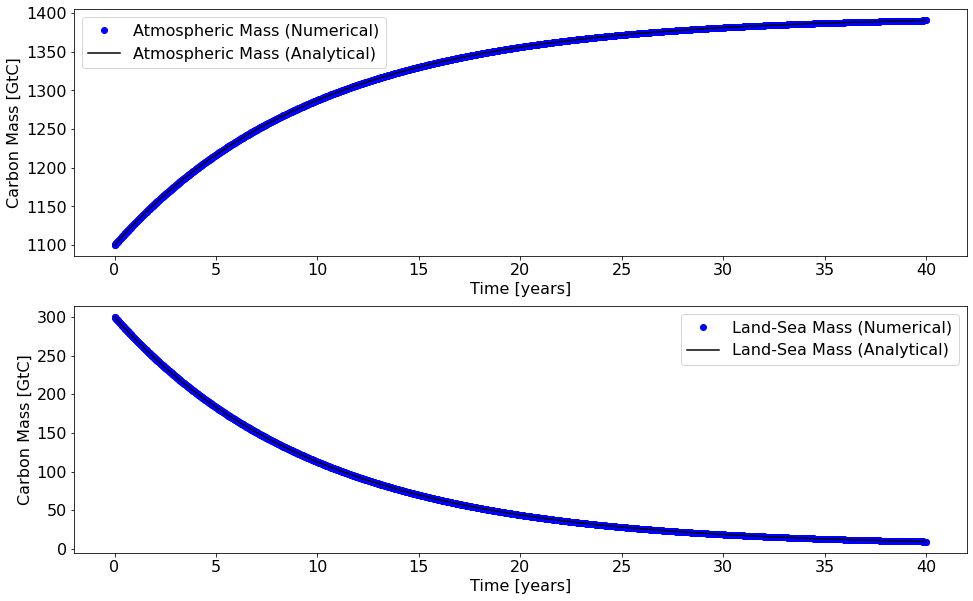

In [6]:
# Visualize results
plt.figure(figsize=(16,10))
plt.rcParams.update({'font.size': 16})
plt.title('Atmospheric-Land Carbon Mass Balance Over 20 Years')

plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='Atmospheric Mass (Numerical)')
plt.plot(t,M1_anlt,'k-', label='Atmospheric Mass (Analytical)')
plt.xlabel('Time [years]')
plt.ylabel('Carbon Mass [GtC]')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='Land-Sea Mass (Numerical)')
plt.plot(t,M2_anlt,'k-', label='Land-Sea Mass (Analytical)')
plt.xlabel('Time [years]')
plt.ylabel('Carbon Mass [GtC]')
plt.legend()


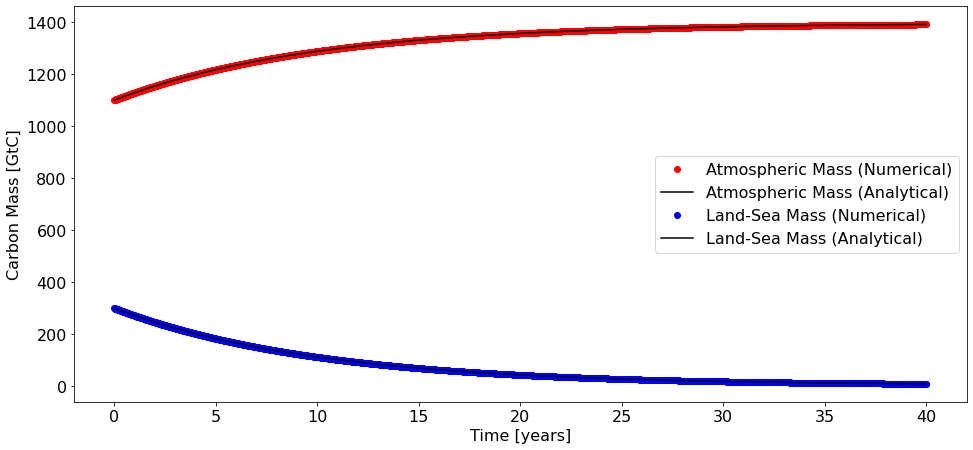

In [7]:
# Visualize results
plt.figure(figsize=(16,16))
plt.rcParams.update({'font.size': 16})
plt.title('Atmospheric-Land Carbon Mass Balance Over 20 Years')

plt.subplot(2,1,1)
plt.plot(t,M1,'ro', label='Atmospheric Mass (Numerical)')
plt.plot(t,M1_anlt,'k-', label='Atmospheric Mass (Analytical)')
plt.plot(t,M2,'bo', label='Land-Sea Mass (Numerical)')
plt.plot(t,M2_anlt,'k-', label='Land-Sea Mass (Analytical)')
plt.xlabel('Time [years]')
plt.ylabel('Carbon Mass [GtC]')
plt.legend()
